In [ ]:
import os
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/ca1data')

In [ ]:
ls

check_syntypes.ipynb       mc2r100.ipynb      syndata_exc.csv
connections_mc2r100.ipynb  proj_mtypes.txt    syndata_inh.csv
connhipp_mc2r100.h5        sonata/            target_mtypes.txt
connhipp_mc2r100.json      source_mtypes.txt


In [ ]:
import h5py
import numpy as np

In [ ]:
f = h5py.File('/content/gdrive/MyDrive/CA1_netpyne/info/data-bbp/20191017/sonata/edges/edges.h5', 'r')
f1 = h5py.File('/content/gdrive/MyDrive/CA1_netpyne/info/data-bbp/20191017/sonata/nodes/nodes.h5', 'r')
f2 = h5py.File('connhipp_mc2r100.h5', 'r')

## Nodes

In [ ]:
number = 0
xmc2 = []
zmc2 = []
gidr100 = []

for gid,x in enumerate(f1['nodes']['hippocampus_neurons']['0']['x']):
    z = f1['nodes']['hippocampus_neurons']['0']['z'][gid]
    if (x-360)*(x-360)+(z-630)*(z-630) <= 100*100:
#         print(gid,x,z,region,f1['nodes']['hippocampus_neurons']['0']['@library']['mtype'][f1['nodes']['hippocampus_neurons']['0']['mtype'][gid]])   
        xmc2.append(x)
        zmc2.append(z)
        gidr100.append(gid)
        number+=1

(524.4081448397181, 744.4081448397181)

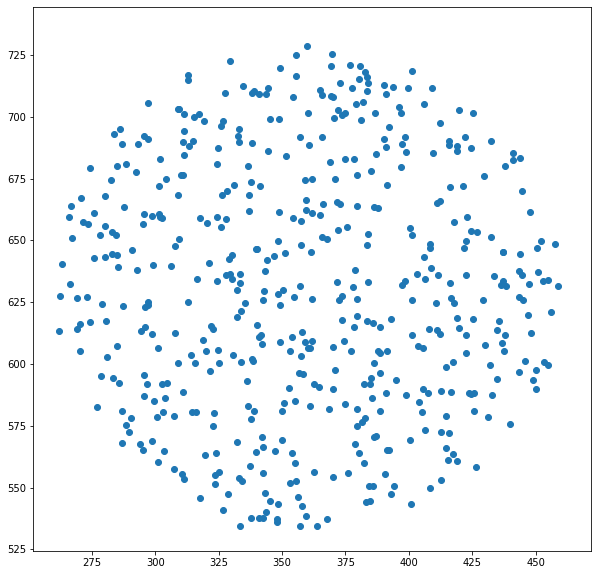

In [ ]:
import matplotlib.pyplot as plt

figSize = (10,10)
fig = plt.figure(figsize=figSize)  # Open a new figure

plt.plot(xmc2,zmc2,'o')
plt.xlim(np.min(xmc2)-10,np.min(xmc2)+210)
plt.ylim(np.min(zmc2)-10,np.min(zmc2)+210)

## Edges

In [ ]:
# number = 0
# imc2r100 = []
# for i,gidpost in enumerate(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id']):
#     if gidpost in gidr100:
#         gidpre = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
#         if gidpre in gidr100:
#             imc2r100.append(i)
#     #         print(gidpre,gidpost)
#             number+=1

imc2r100 = list(f2['edges'])

In [ ]:
#connhipp = {}
#connhipp['nodes'] = {}
#connhipp['nodes']['@library'] = {}
#connhipp['nodes']['dynamics_params'] = {}
#
#for itens in list(f1['nodes']['hippocampus_neurons']['0']['@library']):
#    connhipp['nodes']['@library'][itens] = []
#    for names in list(f1['nodes']['hippocampus_neurons']['0']['@library'][itens]):
#        name = str(names)
#        connhipp['nodes']['@library'][itens].append(name[2:-1])
##         print(itens,name[2:-1])
#
#connhipp['nodes']['dynamics_params']['holding_current'] = []
#connhipp['nodes']['dynamics_params']['threshold_current'] = []
#connhipp['nodes']['gid'] = []
#for itens in list(f1['nodes']['hippocampus_neurons']['0'])[2:]:
#    connhipp['nodes'][itens] = []
#    
#for i in gidr100:
#    connhipp['nodes']['dynamics_params']['holding_current'].append(f1['nodes']['hippocampus_neurons']['0']['dynamics_params']['holding_current'][i])
#    connhipp['nodes']['dynamics_params']['threshold_current'].append(f1['nodes']['hippocampus_neurons']['0']['dynamics_params']['threshold_current'][i])
#    connhipp['nodes']['gid'].append(i)
#    for itens in list(f1['nodes']['hippocampus_neurons']['0'])[2:]:
#        connhipp['nodes'][itens].append(f1['nodes']['hippocampus_neurons']['0'][itens][i])

In [ ]:
import codecs

mtypes = []
for mtype in list(f1['nodes']['hippocampus_neurons']['0']['@library']['mtype']):
  mtypes.append(codecs.decode(mtype, 'UTF-8'))

In [ ]:
mtypes

['SLM_PPA',
 'SO_BP',
 'SO_BS',
 'SO_OLM',
 'SO_Tri',
 'SP_AA',
 'SP_BS',
 'SP_CCKBC',
 'SP_Ivy',
 'SP_PC',
 'SP_PVBC',
 'SR_SCA']

In [ ]:
#mtype = f1['nodes']['hippocampus_neurons']['0']['@library']['mtype'][f1['nodes']['hippocampus_neurons']['0']['mtype'][f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][0]]]

In [ ]:
#proj_mtypes = []
#source_mtypes = []
#target_mtypes = []
#
#for i in imc2r100:
#   source_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
#   target_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][i]
#
#   pre_mtype = mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][source_id]]
#   post_mtype = mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][target_id]]
#
#   source_mtypes.append(pre_mtype)
#   target_mtypes.append(post_mtype)
#
#   proj_mtype = f'{pre_mtype}:{post_mtype}'
#   proj_mtypes.append(proj_mtype)

In [ ]:
#import json
#
#with open("proj_mtypes.txt", "w") as fp:
#  json.dump(proj_mtypes, fp)
#
#with open("source_mtypes.txt", "w") as fp:
#  json.dump(source_mtypes, fp)
#
#with open("target_mtypes.txt", "w") as fp:
#  json.dump(target_mtypes, fp)

In [ ]:
import json

with open("proj_mtypes.txt", "r") as fp:
  proj_mtypes = json.load(fp)

with open("source_mtypes.txt", "r") as fp:
  source_mtypes = json.load(fp)

with open("target_mtypes.txt", "r") as fp:
  target_mtypes = json.load(fp)

In [ ]:
unique_mtypes, counts = np.unique(proj_mtypes, return_counts=True)

In [ ]:
len(counts)

47

In [ ]:
count_proj = {}
for i in range(len(unique_mtypes)):
  count_proj[unique_mtypes[i]] = counts[i]

In [ ]:
import pandas as pd

In [ ]:
count_proj

{'SO_OLM:SP_AA': 2,
 'SO_OLM:SP_CCKBC': 19,
 'SO_OLM:SP_Ivy': 1,
 'SO_OLM:SP_PC': 1421,
 'SO_OLM:SP_PVBC': 31,
 'SP_AA:SP_PC': 1014,
 'SP_BS:SO_OLM': 2,
 'SP_BS:SP_AA': 3,
 'SP_BS:SP_CCKBC': 7,
 'SP_BS:SP_Ivy': 33,
 'SP_BS:SP_PC': 2805,
 'SP_BS:SP_PVBC': 59,
 'SP_BS:SR_SCA': 2,
 'SP_CCKBC:SP_AA': 13,
 'SP_CCKBC:SP_BS': 42,
 'SP_CCKBC:SP_CCKBC': 35,
 'SP_CCKBC:SP_Ivy': 191,
 'SP_CCKBC:SP_PC': 22336,
 'SP_CCKBC:SP_PVBC': 226,
 'SP_CCKBC:SR_SCA': 6,
 'SP_Ivy:SP_AA': 32,
 'SP_Ivy:SP_BS': 66,
 'SP_Ivy:SP_CCKBC': 87,
 'SP_Ivy:SP_Ivy': 301,
 'SP_Ivy:SP_PC': 51320,
 'SP_Ivy:SP_PVBC': 610,
 'SP_Ivy:SR_SCA': 25,
 'SP_PC:SO_OLM': 960,
 'SP_PC:SP_AA': 1506,
 'SP_PC:SP_BS': 647,
 'SP_PC:SP_CCKBC': 2210,
 'SP_PC:SP_Ivy': 4484,
 'SP_PC:SP_PC': 17703,
 'SP_PC:SP_PVBC': 10693,
 'SP_PC:SR_SCA': 261,
 'SP_PVBC:SO_OLM': 1,
 'SP_PVBC:SP_AA': 8,
 'SP_PVBC:SP_BS': 35,
 'SP_PVBC:SP_CCKBC': 43,
 'SP_PVBC:SP_Ivy': 135,
 'SP_PVBC:SP_PC': 12632,
 'SP_PVBC:SP_PVBC': 200,
 'SP_PVBC:SR_SCA': 5,
 'SR_SCA:SO_OLM': 1,


In [ ]:
count_proj = pd.Series(count_proj).to_frame()

<Figure size 1152x432 with 0 Axes>

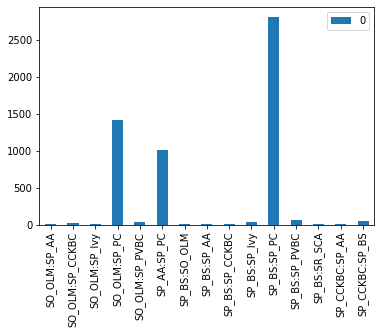

In [ ]:
plt.figure(figsize=(16,6))
ax = count_proj[0:15].plot(kind='bar')

<Figure size 1152x432 with 0 Axes>

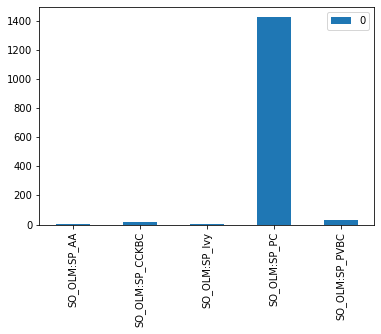

In [ ]:
plt.figure(figsize=(16,6))
ax = count_proj[0:5].plot(kind='bar')

<Figure size 1152x432 with 0 Axes>

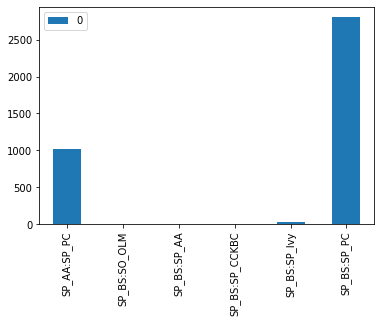

In [ ]:
plt.figure(figsize=(16,6))
ax = count_proj[5:11].plot(kind='bar')

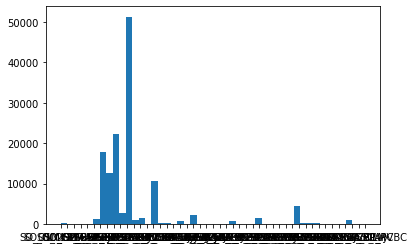

In [ ]:
fig, ax = plt.subplots()
ax.hist(proj_mtypes, bins = 47)
ax.set_xticklabels(unique_mtypes)
plt.show()

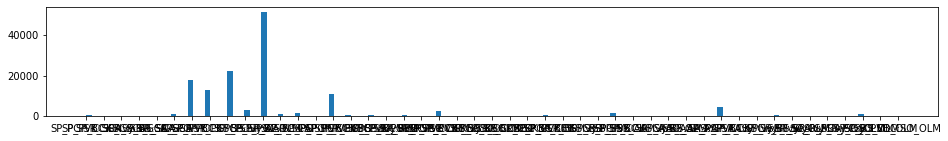

In [ ]:
plt.figure(figsize=(16,2))
plt.hist(proj_mtypes, bins = 144);

In [ ]:
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical'][itens]))

print('\n0')  
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0'][itens]))

print('\nindices[source_to_target]')  
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['source_to_target']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['source_to_target'][itens]))
    
print('\nindices[target_to_source]')  
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['target_to_source']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['target_to_source'][itens]))
  

0 (28,)
edge_type_id (19698045,)
indices (2,)
source_node_id (19698045,)
target_node_id (19698045,)

0
afferent_center_x (19698045,)
afferent_center_y (19698045,)
afferent_center_z (19698045,)
afferent_section_id (19698045,)
afferent_section_pos (19698045,)
afferent_section_pos_orig (19698045,)
afferent_section_type (19698045,)
afferent_segment_id (19698045,)
afferent_segment_offset (19698045,)
conductance (19698045,)
decay_time (19698045,)
delay (19698045,)
depression_time (19698045,)
efferent_section_id (19698045,)
efferent_section_pos (19698045,)
efferent_section_pos_orig (19698045,)
efferent_section_type (19698045,)
efferent_segment_id (19698045,)
efferent_segment_offset (19698045,)
efferent_surface_x (19698045,)
efferent_surface_y (19698045,)
efferent_surface_z (19698045,)
facilitation_time (19698045,)
n_rrp_vesicles (19698045,)
spine_length (19698045,)
syn_type_id (19698045,)
synapse_type_id (19698045,)
u_syn (19698045,)

indices[source_to_target]
node_id_to_ranges (18198, 2)
ran

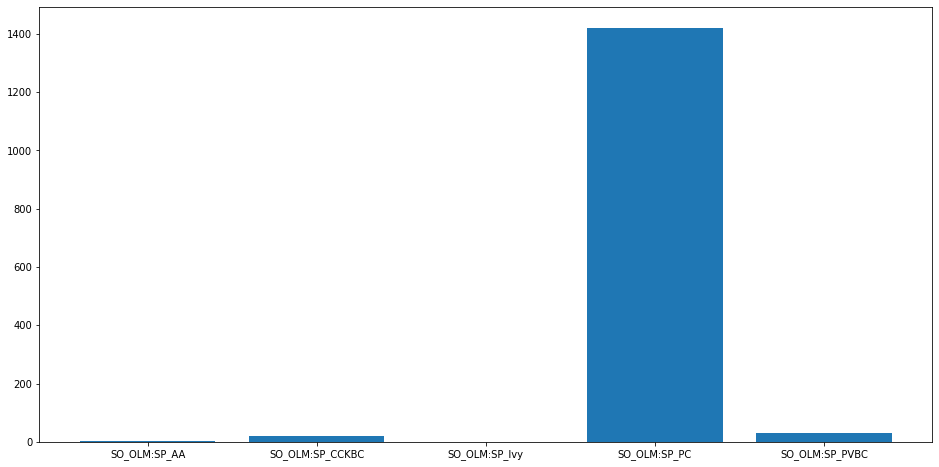

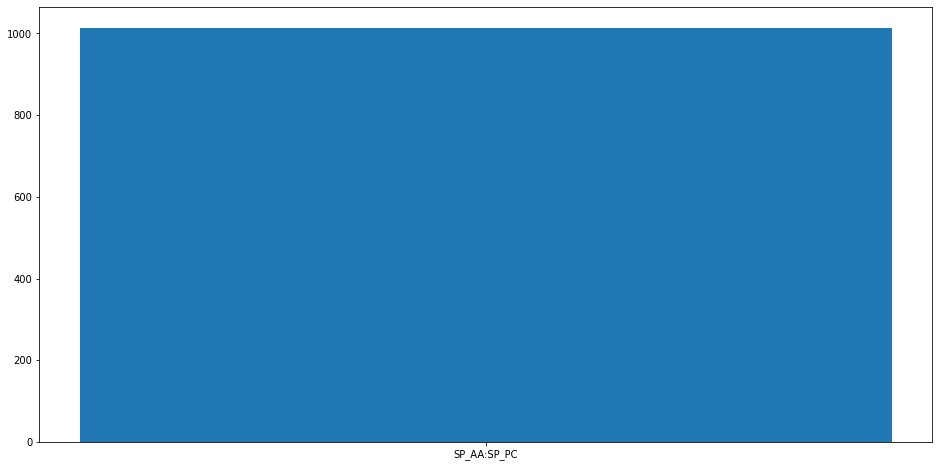

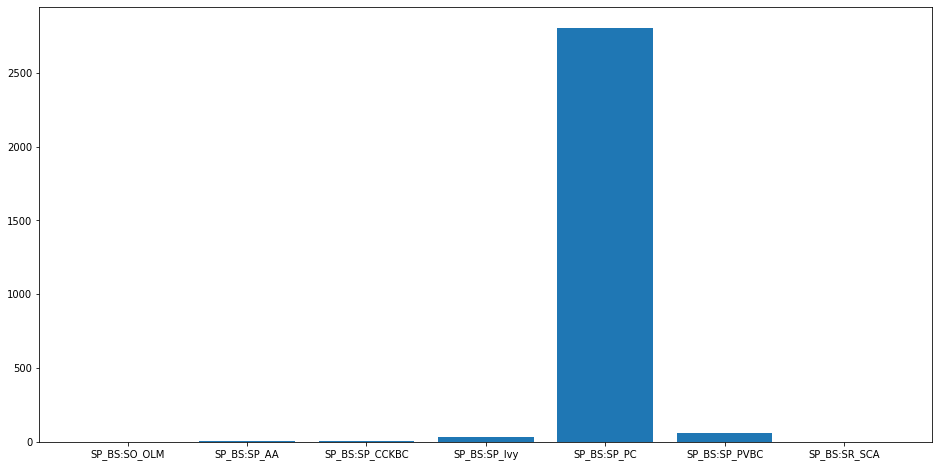

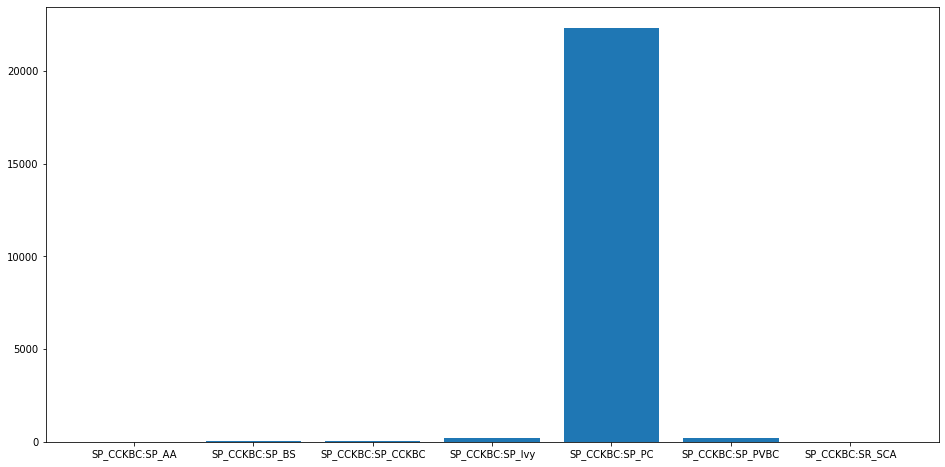

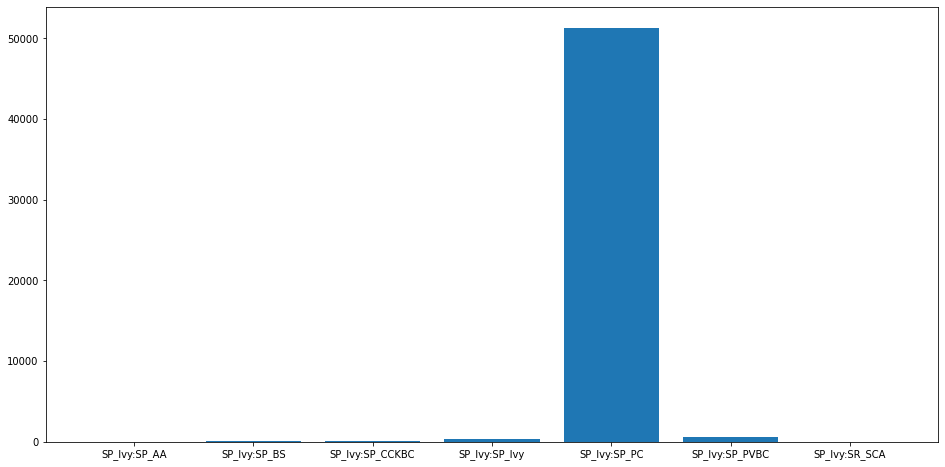

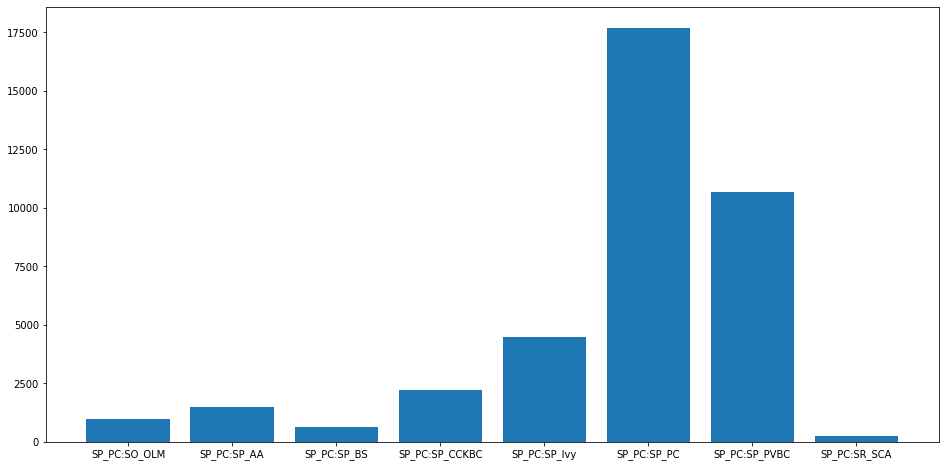

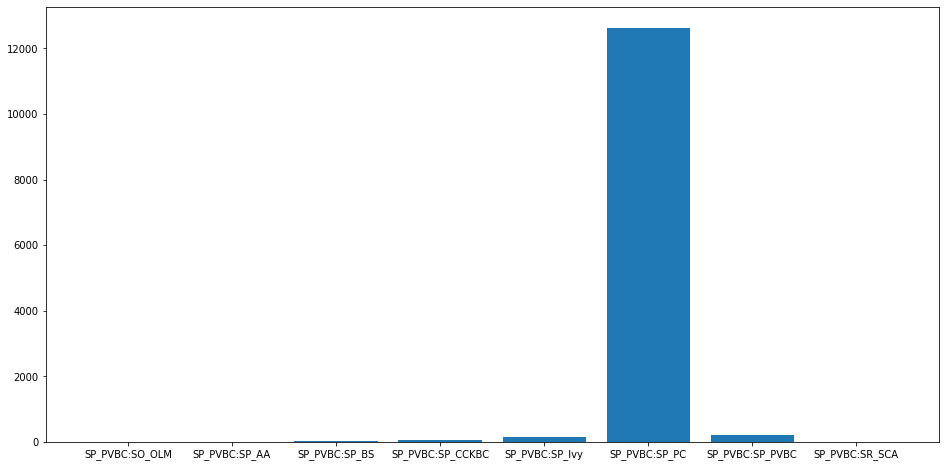

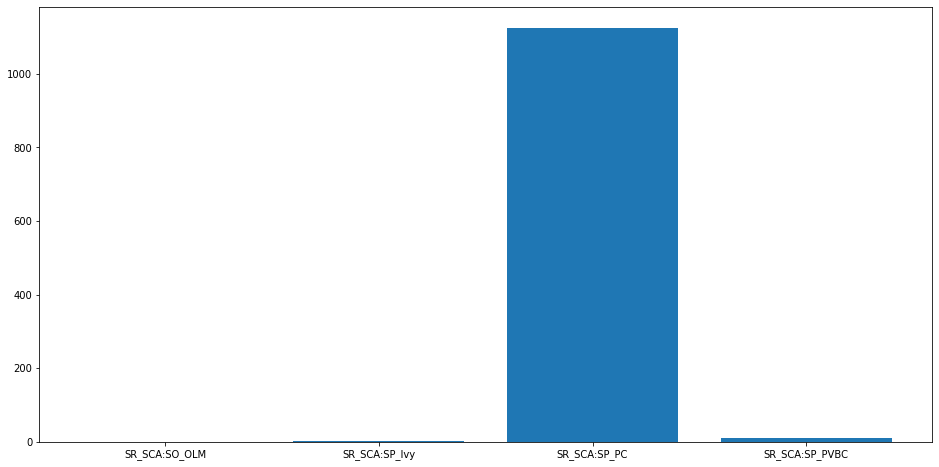

In [ ]:
proj_mtypes = np.array(proj_mtypes)

projections = {}
count_projections = {}
for pre_mtype in np.unique(source_mtypes):
  proj, counts = np.unique(proj_mtypes[np.where(np.array(source_mtypes)==pre_mtype)[0]], return_counts=True)
  projections[pre_mtype] = proj
  count_projections[pre_mtype] = counts
  plt.figure(figsize=[16,8])
  plt.bar(projections[pre_mtype], count_projections[pre_mtype])
  #plt.ylim(20000)

In [ ]:
with open('connhipp_mc2r100.json', "r") as fp:
  parameters = json.load(fp)

In [ ]:
projs = np.unique(proj_mtypes)

conductance = []
conductance_std = []

decay_time = []
decay_time_std = []

u_syn = []
u_syn_std = []

depression_time = []
depression_time_std = []

facilitation_time = []
facilitation_time_std = []

n_rrp_vesicles = []


for proj in projs:
  conductance.append(np.mean(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]]))
  conductance_std.append(np.std(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]]))
  
  decay_time.append(np.mean(np.array(parameters['edges']['decay_time'])[np.where(proj_mtypes==proj)[0]]))
  decay_time_std.append(np.std(np.array(parameters['edges']['decay_time'])[np.where(proj_mtypes==proj)[0]]))

  u_syn.append(np.mean(np.array(parameters['edges']['u_syn'])[np.where(proj_mtypes==proj)[0]]))
  u_syn_std.append(np.std(np.array(parameters['edges']['u_syn'])[np.where(proj_mtypes==proj)[0]]))
  
  depression_time.append(np.mean(np.array(parameters['edges']['depression_time'])[np.where(proj_mtypes==proj)[0]]))
  depression_time_std.append(np.std(np.array(parameters['edges']['depression_time'])[np.where(proj_mtypes==proj)[0]]))

  facilitation_time.append(np.mean(np.array(parameters['edges']['facilitation_time'])[np.where(proj_mtypes==proj)[0]]))
  facilitation_time_std.append(np.std(np.array(parameters['edges']['facilitation_time'])[np.where(proj_mtypes==proj)[0]]))

  n_rrp_vesicles.append(np.mean(np.array(parameters['edges']['n_rrp_vesicles'])[np.where(proj_mtypes==proj)[0]]))

In [ ]:
ca1_data = {}

ca1_data['projections'] = projs

ca1_data['conductance'] = conductance
ca1_data['conductance_std'] = conductance_std

ca1_data['decay_time'] = decay_time
ca1_data['decay_time_std'] = decay_time_std

ca1_data['u_syn'] = u_syn
ca1_data['u_syn_std'] = u_syn_std

ca1_data['depression_time'] = depression_time
ca1_data['depression_time_std'] = depression_time_std

ca1_data['facilitation_time'] = facilitation_time
ca1_data['facilitation_time_std'] = facilitation_time_std

ca1_data['n_rrp_vesicles'] = n_rrp_vesicles

In [ ]:
ca1 = pd.DataFrame(ca1_data)

In [ ]:
ca1

,projections,conductance,conductance_std,decay_time,decay_time_std,u_syn,u_syn_std,depression_time,depression_time_std,facilitation_time,facilitation_time_std,n_rrp_vesicles
0,SO_OLM:SP_AA,2.104232,0.000000,3.755018,0.000000,0.242182,0.000000,970.475769,0.000000,2.471480,0.000000,1.000000
1,SO_OLM:SP_CCKBC,2.399427,0.408276,3.538907,0.302290,0.272408,0.014554,893.913137,166.814924,2.538732,0.651951,1.000000
2,SO_OLM:SP_Ivy,1.796479,0.000000,4.111326,0.000000,0.296343,0.000000,735.527771,0.000000,1.209852,0.000000,1.000000
3,SO_OLM:SP_PC,1.301133,0.292598,8.256472,1.252592,0.292250,0.042354,1250.358671,478.156400,1.393509,7.989495,1.000000
4,SO_OLM:SP_PVBC,2.006640,0.280588,3.938897,0.306470,0.271850,0.016311,914.320261,324.381963,1.561192,0.519227,1.000000
5,SP_AA:SP_PC,2.359104,0.201813,6.172159,0.329252,0.099954,0.005380,1323.949509,688.963228,9.082943,5.554694,1.000000
6,SP_BS:SO_OLM,2.023530,0.000000,3.887870,0.000000,0.293733,0.000000,928.251892,0.000000,1.006596,0.000000,1.000000
7,SP_BS:SP_AA,1.952848,0.000000,4.197608,0.000000,0.280584,0.000000,1290.307007,0.000000,1.511477,0.000000,1.000000
8,SP_BS:SP_CCKBC,2.303933,0.120949,3.354564,0.080909,0.264033,0.011101,789.931449,163.701531,1.149324,0.511845,1.000000
9,SP_BS:SP_Ivy,2.052334,0.153531,3.768102,0.432922,0.240833,0.022357,960.343443,204.302078,1.436493,0.519473,1.000000


In [ ]:
ca1['u_syn_std'][ca1['projections']=='SP_PVBC:SP_PC']

40    0.010573
Name: u_syn_std, dtype: float64

In [ ]:
projs = np.unique(proj_mtypes)

conductance = []
conductance_std = []

decay_time = []
decay_time_std = []

u_syn = []
u_syn_std = []

depression_time = []
depression_time_std = []

facilitation_time = []
facilitation_time_std = []

n_rrp_vesicles = []


for proj in projs:
  conductance.append(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]])
    
  decay_time.append(np.array(parameters['edges']['decay_time'])[np.where(proj_mtypes==proj)[0]])

  u_syn.append(np.array(parameters['edges']['u_syn'])[np.where(proj_mtypes==proj)[0]])

  depression_time.append(np.array(parameters['edges']['depression_time'])[np.where(proj_mtypes==proj)[0]])
  
  facilitation_time.append(np.array(parameters['edges']['facilitation_time'])[np.where(proj_mtypes==proj)[0]])
  
  n_rrp_vesicles.append(np.array(parameters['edges']['n_rrp_vesicles'])[np.where(proj_mtypes==proj)[0]])

In [ ]:
ca1['conductance'][ca1['projections']=='SO_OLM:SP_AA']

0    2.104232
Name: conductance, dtype: float64

(array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
 array([1.60423183, 1.70423183, 1.80423183, 1.90423183, 2.00423183,
        2.10423183, 2.20423183, 2.30423183, 2.40423183, 2.50423183,
        2.60423183]),
 <a list of 10 Patch objects>)

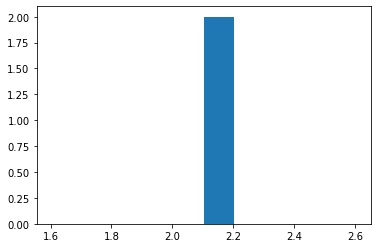

In [ ]:
plt.hist(conductance[0]);

In [ ]:
params = ['conductance', 'decay_time', 'u_syn', 'depression_time', 'facilitation_time', 'n_rrp_vesicles']
params_unique_mtypes = [conductance, decay_time, u_syn, depression_time, facilitation_time, n_rrp_vesicles]

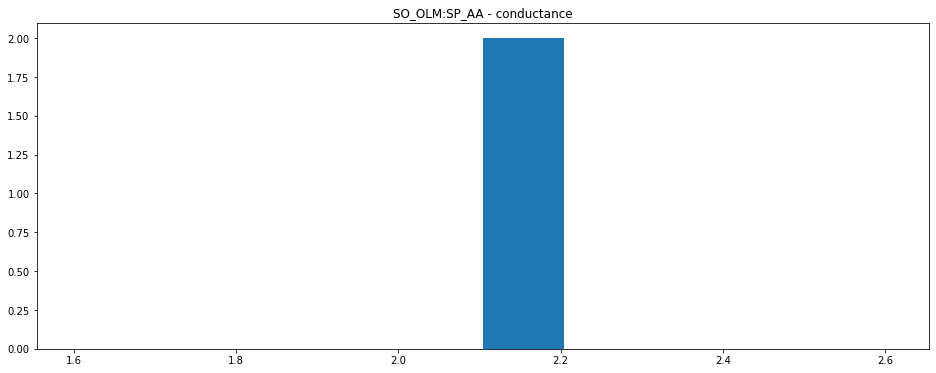

In [ ]:
plt.figure(figsize=(16,6));
plt.title(f'{projs[i]} - {params[0]}');
plt.hist(params_unique_mtypes[0][i]);

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1.60423183, 1.70423183, 1.80423183, 1.90423183, 2.00423183,
        2.10423183, 2.20423183, 2.30423183, 2.40423183, 2.50423183,
        2.60423183]),
 <a list of 10 Patch objects>)

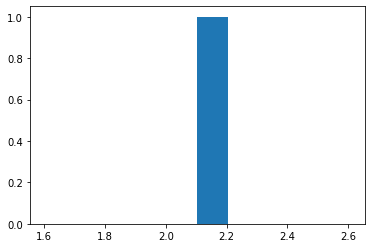

In [ ]:
plt.hist(ca1['conductance'][i])

In [ ]:
for i_proj in range(len(projs)):
  for i_param in range(len(params)):
    plt.figure(figsize=(16,6));
    plt.title(f'{projs[i_proj]} - {params[i_param]}');
    plt.hist(params_unique_mtypes[i_param][i_proj], bins = 100);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ls

analise_mc2r100.ipynb  connhipp_mc2r100.json  sonata/
check_syntypes.ipynb   mc2r100.ipynb          source_mtypes.txt
connhipp_mc2r100.h5    proj_mtypes.txt        target_mtypes.txt


In [ ]:
import json
import h5py
import numpy as np

with open('connhipp_mc2r100.json', "r") as fp:
  connCa1 = json.load(fp)
  
f = h5py.File('/content/gdrive/MyDrive/CA1_netpyne/info/data-bbp/20191017/sonata/edges/edges.h5', 'r')
f1 = h5py.File('/content/gdrive/MyDrive/CA1_netpyne/info/data-bbp/20191017/sonata/nodes/nodes.h5', 'r')
f2 = h5py.File('connhipp_mc2r100.h5', 'r')

Fernando


In [ ]:
pre = str(connCa1['edges']['source_node_id'][0])
post = str(connCa1['edges']['target_node_id'][0])
connNumber = 0
connList = {}
connList[connNumber] = []
connList[connNumber].append(str(connCa1['edges']['source_node_id'][0]))
connListpost = []
connListpost.append(str(connCa1['edges']['target_node_id'][0]))

for synID in range(1,133352):
  if pre == str(connCa1['edges']['source_node_id'][synID]) and post == str(connCa1['edges']['target_node_id'][synID]):
    connList[connNumber].append(str(connCa1['edges']['source_node_id'][synID]))
  else:
    connNumber+=1
    connList[connNumber] = []
    connList[connNumber].append(str(connCa1['edges']['source_node_id'][synID]))
    connListpost.append(str(connCa1['edges']['target_node_id'][synID]))

    if pre in Epops:
      netParams.synMechParams['synMech_' + pre + '_' + post] = {'mod': 'DetAMPANMDA', 
                                                'tau_d_AMPA':connCa1['edges']['decay_time'][synID],
                                                'Use': connCa1['edges']['u_syn'][synID], 
                                                'Dep': connCa1['edges']['depression_time'][synID], 
                                                'Fac': connCa1['edges']['facilitation_time'][synID]}

    else:
      netParams.synMechParams['synMech_' + pre + '_' + post]={'mod':'DetGABAAB', 
                                        'tau_d_GABAA':connCa1['edges']['decay_time'][synID],
                                        'Use': connCa1['edges']['u_syn'][synID], 
                                        'Dep': connCa1['edges']['depression_time'][synID], 
                                        'Fac': connCa1['edges']['facilitation_time'][synID]} 

  pre = str(connCa1['edges']['source_node_id'][synID])
  post = str(connCa1['edges']['target_node_id'][synID])

In [ ]:
connNumber

24647

In [ ]:
connNumber = 0
synID = 0

for connID in range(24647):
    pre = connList[connNumber][0]
    post = connListpost[connNumber]
        
    netParams.connParams['connID_' + pre + '_' + post] = {        
        'preConds': {'pop': pre},
        'postConds': {'pop': post},
        'synsPerConn': np.size(connList[connNumber]),
        'sec': connCa1['edges']['efferent_section_id'][synID:synID+np.size(connList[connNumber])], # se não der certo -> connCa1['edges']['efferent_section_id'][synID]
        'synMech': 'synMech_' + pre + '_' + post,
        'weight': connCa1['edges']['conductance'][synID:synID+np.size(connList[connNumber])],
        'delay': connCa1['edges']['delay'][synID:synID+np.size(connList[connNumber])]
        }
    connNumber+=1
    synID+=np.size(connList[connNumber])


In [ ]:
for synID in range(133352):
    netParams.connParams['synID_' + str(synID)] = {
        
        pre = connCa1['edges']['source_node_id'][synID]
        post = connCa1['edges']['target_node_id'][synID]
        
        preMype = str(f1['nodes']['hippocampus_neurons']['0']['@library']['mtype'][f1['nodes']['hippocampus_neurons']['0']['mtype'][pre]])
        preMype = preMype[2:-1]        
        postMype = str(f1['nodes']['hippocampus_neurons']['0']['@library']['mtype'][f1['nodes']['hippocampus_neurons']['0']['mtype'][post]])
        postMype = postMype[2:-1]
        
        'preConds': {'pop': str(pre)},
        'postConds': {'pop': str(post)},
        'sec': connCa1['edges']['efferent_section_id'],
        'synsPerConn': 1,
        'synMech': matrix['synTape'][preMype][postMype],
        'weight': connCa1['edges']['conductance'],
        'delay': connCa1['edges']['delay']
        }



---



# Synapses Per Connection

In [ ]:
source_id_anterior = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][0]
target_id_anterior = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][0]
count = 1
syns_mtypes = []
n_syns = []
index = 0

for i in imc2r100[1:]:
  index = index + 1
  source_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
  target_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][i]
  if source_id == source_id_anterior and target_id == target_id_anterior:
    count = count + 1
  else:
    n_syns.append(count)
    count = 1
    syns_mtypes.append(proj_mtypes[index])
    source_id_anterior = source_id
    target_id_anterior = target_id

   

In [ ]:
n_synsperconn = []
n_syns = np.array(n_syns)

for proj in unique_mtypes:
  n_synsperconn.append(np.rint(np.mean(n_syns[np.where(np.array(syns_mtypes)==proj)[0]])))


In [ ]:
pre_mtypes = []
post_mtypes = []
for proj in unique_mtypes:
  split = proj.split(sep=':')
  pre_mtypes.append(split[0])
  post_mtypes.append(split[1])


In [ ]:
synsPerConn = {}
synsPerConn['pre'] = pre_mtypes
synsPerConn['post'] = post_mtypes
synsPerConn['proj'] = unique_mtypes
synsPerConn['n_syns'] = n_synsperconn

In [ ]:
synsPerConn = pd.DataFrame(synsPerConn)
synsPerConn

,pre,post,proj,n_syns
0,SO_OLM,SP_AA,SO_OLM:SP_AA,7.0
1,SO_OLM,SP_CCKBC,SO_OLM:SP_CCKBC,4.0
2,SO_OLM,SP_Ivy,SO_OLM:SP_Ivy,5.0
3,SO_OLM,SP_PC,SO_OLM:SP_PC,16.0
4,SO_OLM,SP_PVBC,SO_OLM:SP_PVBC,6.0
5,SP_AA,SP_PC,SP_AA:SP_PC,8.0
6,SP_BS,SO_OLM,SP_BS:SO_OLM,2.0
7,SP_BS,SP_AA,SP_BS:SP_AA,1.0
8,SP_BS,SP_CCKBC,SP_BS:SP_CCKBC,1.0
9,SP_BS,SP_Ivy,SP_BS:SP_Ivy,5.0


In [ ]:
import seaborn as sns

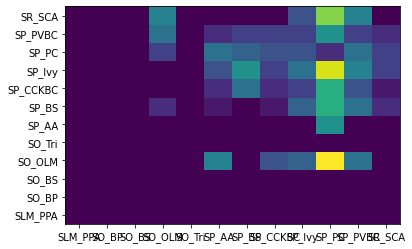

In [ ]:
synsPerMtype = []
for pre in mtypes:
  line = []
  for post in mtypes:
    proj = '%s:%s' % (pre, post)
    if proj in unique_mtypes:
      line.append(float(synsPerConn[synsPerConn['proj']==proj]['n_syns']))
    else:
      line.append(0)
  synsPerMtype.append(line)

df = pd.DataFrame(synsPerMtype, index=mtypes, columns=mtypes)

plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

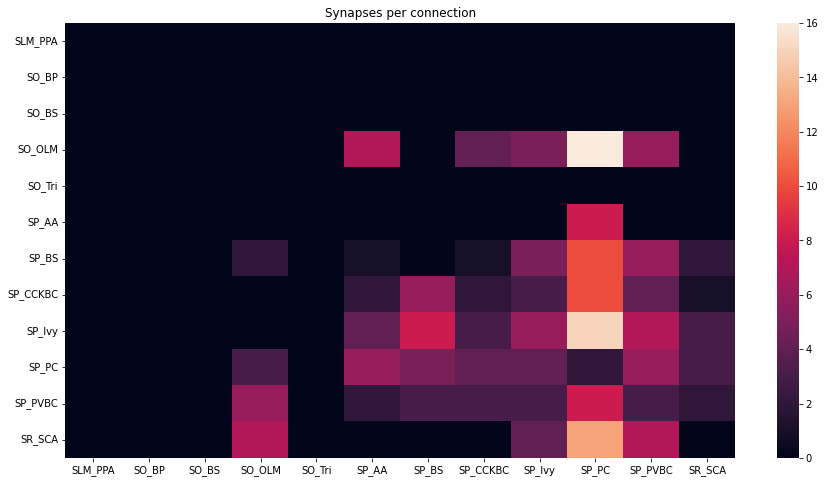

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Synapses per connection')
ax = sns.heatmap(df)

O código abaixo pode ser utilizado para importar o número de sinapses com mais detalhe!

In [ ]:
#synapses = []

#for i in imc2r100[1:1000]:
#  pre = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
#  post = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
  
#  syn = '%s:%s' % (pre, post)

#  synapses.append(syn)

In [ ]:
#synapses_ids, number_synapses = np.unique(synapses, return_counts=True)

In [ ]:
#number_synapses

array([ 1,  1,  2,  1,  1,  2,  2,  1,  2,  2,  2,  1,  1,  3,  4,  3,  2,
        1,  1,  4,  6,  2,  2,  2,  4,  5,  4,  7,  4,  2,  4,  2,  2,  3,
        2,  1,  1,  1,  2,  1,  3,  2,  1, 10,  2,  3,  2,  1,  3,  4,  2,
        3,  1,  3,  3,  2,  1,  1,  2,  2,  2,  4,  3,  5,  2,  3,  1, 11,
       34, 18, 27, 17, 10,  6, 36, 19, 15, 16, 18, 10, 15, 12, 14, 61, 31,
       48, 47, 10, 27, 32, 38,  5, 38,  1,  1,  3,  4,  1,  3,  6,  9,  3,
        3,  2,  2,  1,  1,  1,  3,  2,  2,  2,  1,  1,  5,  1,  4,  3,  8,
        3,  1,  2,  1,  3,  2,  2,  2,  1,  2,  5,  1,  3,  1,  1,  3,  2,
        1,  2,  9,  2,  2,  2,  1,  3,  1,  9,  4,  2,  2,  1,  1,  2,  1,
        2,  2,  1,  3,  1,  5,  2,  3,  3,  2,  4,  4,  1,  1,  2,  2,  4,
        1,  3,  2,  2,  3,  4,  2,  2,  2,  3])

1*) cp from data to sim (ok)

2º) run and compare (erro no colab)

3 - testar os mods criando uma conexão para cada par de mtype se existe na tabela de 47 (criado, mas preciso pega os gids)

4 - conectar todos os 531 usando os .h5 do BBP e rezar